## Recognizing CIFAR-10 images with Data Augmentation (Part III)

CIFAR-10 dataset contains 60,000 color images of size 32*32 pixels which are divided in 10 classes.
We will use Keras library to import the dataset which contains 50,000 images as training iamges
and 10,000 as test images

In [Part I](https://github.com/chhayac/Machine-Learning-Notebooks/blob/master/Recognizing-CIFAR-10-images-Simple-Model.ipynb), 
we used a simple Convolutional Neural Network model with only one hidden layer. Model gave accuracy of 66.94% on test data. In [Part 2](https://github.com/chhayac/Machine-Learning-Notebooks/blob/master/Recognizing-CIFAR-10-images-Improved-Model.ipynb),we improved the accuracy further to 78.65 by increasing the number of convolutional layers.

Goal of this part is to improve the accuracy of the model by using data augmentation like horizontal flip, zooming, etc.

In [53]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt
% matplotlib inline

In [54]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [55]:
BATCH_SIZE = 128
nb_epochs = 40
VALIDATION_SPLIT = 0.2
num_classes = 10

In [56]:
num_train, img_channels, img_rows, img_cols = X_train.shape
num_test, _, _, _= X_test.shape

In [57]:
print('X_train Shape:', X_train.shape)
training_samples = X_train.shape[0]
print("Training samples:", training_samples)
print("Test Samples:", y_test.shape[0])

X_train Shape: (50000, 32, 32, 3)
Training samples: 50000
Test Samples: 10000


In [58]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

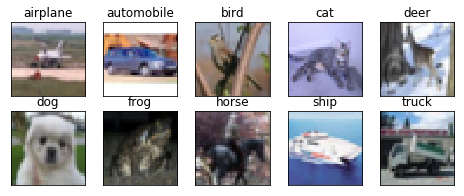

In [59]:
fig = plt.figure(figsize =(8, 3))
for i in range(num_classes):
    axis = fig.add_subplot(2, 5, 1+i, xticks = [], yticks = [])
    idx = np.where(y_train[:] == i)[0]
    features_idx = X_train[idx, ::]
    image_num = np.random.randint(features_idx.shape[0])
    image = features_idx[image_num,::]
    axis.set_title(class_names[i])
    plt.imshow(image)
plt.show()

One hot Encoding

In [60]:
# convert to categorical
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [61]:
#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [62]:
from keras import backend as K
if K.backend() == 'tensorflow':
    K.set_image_dim_ordering('tf')

Building sequential model

In [63]:
# Network
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))

    # Adding more layers to improve the model
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [64]:
model = create_cnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
__________

Compiling the model

In [65]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

Training the model

In [66]:
model_history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs, 
          validation_split = VALIDATION_SPLIT, verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 13s 315us/step - loss: 1.7984 - acc: 0.3482 - val_loss: 1.4486 - val_acc: 0.4792
Epoch 2/40
40000/40000 [==============================] - 12s 304us/step - loss: 1.3739 - acc: 0.5104 - val_loss: 1.1942 - val_acc: 0.5778
Epoch 3/40
40000/40000 [==============================] - 12s 304us/step - loss: 1.1617 - acc: 0.5924 - val_loss: 1.0264 - val_acc: 0.6332
Epoch 4/40
40000/40000 [==============================] - 12s 305us/step - loss: 1.0202 - acc: 0.6408 - val_loss: 1.0277 - val_acc: 0.6481
Epoch 5/40
40000/40000 [==============================] - 12s 305us/step - loss: 0.9151 - acc: 0.6812 - val_loss: 0.8667 - val_acc: 0.6938
Epoch 6/40
40000/40000 [==============================] - 12s 305us/step - loss: 0.8339 - acc: 0.7088 - val_loss: 0.8095 - val_acc: 0.7215
Epoch 7/40
40000/40000 [==============================] - 12s 305us/step - loss: 0.7743 - acc: 0.7328 - val_loss: 0.

List all data in history

In [67]:
print(model_history.history.keys())

dict_keys(['loss', 'val_loss', 'acc', 'val_acc'])


Summarize history for accuracy

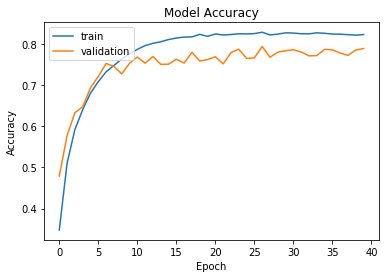

In [68]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Summarize history for loss

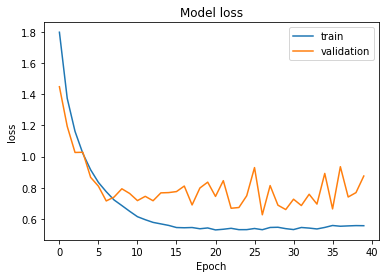

In [69]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [70]:
score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose =1)

10000/10000 [==============================] - 1s 97us/step


In [71]:
print("Test Loss", score[0])
print("Test accuracy", score[1])

Test Loss 0.915297679043
Test accuracy 0.7836


This accuracy is 12% better than what we got in Part I.

## Performing Data Augmentation
Now we will perform data augmentation on the improved model which might improve the accuracy little more.

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
# load dataset
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Augmenting training set images
datagen = ImageDataGenerator(zoom_range = 0.2,
                            horizontal_flip = True)
datagen.fit(X_train)

In [28]:
model_aug = create_cnn_model()
model_aug.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

In [29]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
import h5py as h5py

In [30]:
lr = 0.01
def learning_rate_decay(epoch):
    return lr * (0.1 ** int(epoch / 10)) 

In [31]:
model_history = model_aug.fit_generator(datagen.flow(X_train, y_train, 
                                                     batch_size = BATCH_SIZE), 
                                        steps_per_epoch = X_train.shape[0] / BATCH_SIZE,
                                        epochs = nb_epochs, verbose = 1,
                                        validation_data = (X_test, y_test),
                                        callbacks = [ModelCheckpoint('model_aug.h5', save_best_only =True),
                                                     EarlyStopping(monitor='val_acc', min_delta=0.000001, patience=10, \
                                                     verbose=1, mode='auto')])

Epoch 1/40
391/390 [==============================] - 19s 48ms/step - loss: 1.7620 - acc: 0.3625 - val_loss: 1.3931 - val_acc: 0.5072
Epoch 2/40
391/390 [==============================] - 18s 47ms/step - loss: 1.3146 - acc: 0.5350 - val_loss: 1.0961 - val_acc: 0.6049
Epoch 3/40
391/390 [==============================] - 18s 47ms/step - loss: 1.1220 - acc: 0.6068 - val_loss: 0.9468 - val_acc: 0.6632
Epoch 4/40
391/390 [==============================] - 18s 46ms/step - loss: 1.0077 - acc: 0.6486 - val_loss: 0.8146 - val_acc: 0.7159
Epoch 5/40
391/390 [==============================] - 18s 47ms/step - loss: 0.9303 - acc: 0.6757 - val_loss: 0.8654 - val_acc: 0.6997
Epoch 6/40
391/390 [==============================] - 18s 46ms/step - loss: 0.8822 - acc: 0.6940 - val_loss: 0.7934 - val_acc: 0.7249
Epoch 7/40
391/390 [==============================] - 18s 46ms/step - loss: 0.8422 - acc: 0.7076 - val_loss: 0.8192 - val_acc: 0.7186
Epoch 8/40
391/390 [==============================] - 18s 47ms

## Accuracy and Loss curves
Summarize history for Accuracy

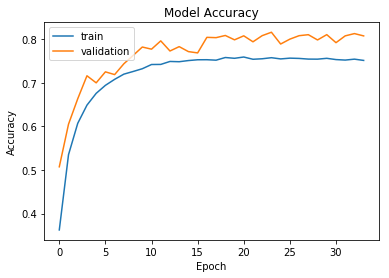

In [32]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Summarize history for Loss

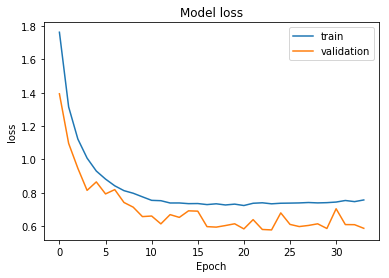

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [34]:
score = model_aug.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose =1)

10000/10000 [==============================] - 1s 99us/step


In [35]:
print("Test Loss", score[0])
print("Test accuracy", score[1])

Test Score 0.587267442322
Test accuracy 0.8073


Clearly, by using data augmentation accuracy has improved by approximately 2%.